**Imports**


In [ ]:
import pandas as pd
import re
import pandas as pd
import numpy as np

**Cleaning the data**

In [ ]:
# Read the JSON file
with open('/content/drive/MyDrive/data_bootcamp/DS_project/2021.json', 'r') as json_file:
    data = pd.read_json(json_file)

# Save as a CSV file
data.to_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2021.csv', index=False)

print("Conversion successful! CSV file created: output.csv")

Conversion successful! CSV file created: output.csv


In [ ]:
E2P_map = {'۱':'1' , '۲':'2', '۳':'3', '۴':'4', '۵':'5', '۶':'6', '۷':'7', '۸':'8', '۹':'9', '۰':'0', '٬':'' }

# تبدیل اعداد انگلیسی به فارسی در رشته ورودی
def convert_number(strIn : str):
    a = map(lambda ch: E2P_map[ch] if ch in E2P_map else ch, strIn)
    return ''.join(list(a))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_2021 = pd.read_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2021.csv')
df_2021 = df_2021[df_2021['sub_category'] == 'apartment-sell']
df_2021 = df_2021.drop(columns=['token','sub_category','category','title','business_type','credit','rent','location','agency','balcony','floor'])
df_2021['district'] = df_2021['district'].str.split('(', 0).str[0]
# print(df_2021.shape)
df_2021.head()
# unique_values_2021 = df_2021['district'].unique()
# print(len(unique_values_2021))

<ipython-input-41-61fe94b8f338>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_2021['district'] = df_2021['district'].str.split('(', 0).str[0]


,district,price,area,year,room,elevator,parking,storage
0,پرند,240000000.000,84.000,1399.000,2.000,False,True,True
7,نازی‌آباد,1400000000.000,53.000,1394.000,1.000,True,True,True
8,آذربایجان,1580000000.000,70.000,1385.000,2.000,True,True,True
9,دروس,NaN,280.000,1399.000,4.000,True,True,True
10,آهنگ,700000000.000,45.000,1382.000,1.000,True,False,True


In [ ]:
df_2023=data = pd.read_csv('/content/drive/MyDrive/data_bootcamp/2023.csv')
# print(df_2023.shape)
df_2023['Price'] = df_2023['Price'].str.replace('تومان', '')
df_2023['Price'] = df_2023['Price'].apply(convert_number)
df_2023['Address'] = df_2023['Address'].str.replace('ساعت پیش در تهران، ', '')
df_2023['Address'] = df_2023['Address'].str.replace('نیم', '')
df_2023['Address'] = df_2023['Address'].str.replace('یک ربع پیش در تهران', '')
df_2023['Address'] = df_2023['Address'].str.replace('۱ ', '')
df_2023['Address'] = df_2023['Address'].str.split('،', 0).str[0]
df_2023 = df_2023.rename(columns={'Address': 'district'})
# df_2023 = df_2023.rename(columns={'Warehouse': 'storage'})
df_2023 = df_2023.rename(columns={'Construction': 'year'})
df_2023 = df_2023.rename(columns={'Warehouse': 'storage'})
df_2023 = df_2023.rename(columns={'Room': 'room'})
df_2023 = df_2023.rename(columns={'Elevator': 'elevator'})
df_2023 = df_2023.rename(columns={'Parking': 'parking'})
df_2023 = df_2023.rename(columns={'Price': 'price'})
df_2023 = df_2023.rename(columns={'Area': 'area'})
df_2023['district']=df_2023['district'].apply(lambda x: re.sub("['۰۱۲۳۴۵۶۷۸۹']", '', x))
df_2023['district'] = df_2023['district'].str.split('(', 0).str[0]
df_2023.head(1000)

<ipython-input-42-59471eacab5b>:1: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2023=data = pd.read_csv('/content/drive/MyDrive/data_bootcamp/2023.csv')
<ipython-input-42-59471eacab5b>:9: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_2023['Address'] = df_2023['Address'].str.split('،', 0).str[0]
<ipython-input-42-59471eacab5b>:20: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_2023['district'] = df_2023['district'].str.split('(', 0).str[0]


,area,year,room,storage,parking,elevator,district,price
0,153,1393,3,True,True,True,درکه,18360000000
1,418,1382,4,True,True,True,زعفرانیه,130000000000
2,57,1385,2,False,False,True,جابری,2600000000
3,193,1371,3,False,False,True,فرمانیه,23000000000
4,62,1401,1,True,True,True,دهکده المپیک,1410000000
...,...,...,...,...,...,...,...,...
995,103,1388,2,True,False,True,تهرانپارس غربی,7100000000
996,105,1401,2,True,True,True,قیطریه,13650000000
997,323,1400,3,True,True,True,باغ فردوس,94057600000
998,260,1384,3,True,True,True,زعفرانیه,45000000000


<Axes: >

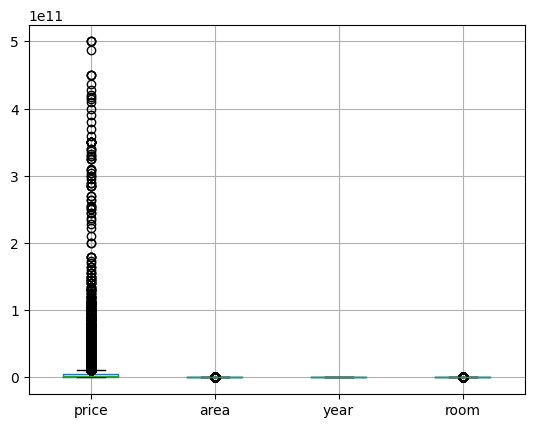

In [ ]:
df_2021.boxplot()

In [ ]:
mapping = {'False': 0, 'True': 1, False: 0, True: 1, 'ندارد': 0, 'دارد': 1,}
df_2021['storage'] = df_2021['storage'].map(mapping)
df_2021['elevator'] = df_2021['elevator'].map(mapping)
df_2021['parking'] = df_2021['parking'].map(mapping)

df_2023['storage'] = df_2023['storage'].map(mapping)
df_2023['elevator'] = df_2023['elevator'].map(mapping)
df_2023['parking'] = df_2023['parking'].map(mapping)


In [ ]:
columns_to_convert = ['area', 'year', 'room', 'price']  # list the column names you want to convert

for column in columns_to_convert:
    df_2023[column] = pd.to_numeric(df_2023[column], errors='coerce')

**Finding Common Districts**

In [ ]:
# Normalize the strings in the columns you want to compare
df_2021['district'] = df_2021['district'].str.replace('\u200c', ' ').str.strip().replace(' +', ' ', regex=True)
df_2023['district'] = df_2023['district'].str.replace('\u200c', ' ').str.strip().replace(' +', ' ', regex=True)

# Now find the common values
common_values = df_2023[df_2023['district'].isin(df_2021['district'])]['district'].unique()
print(len(common_values))
# print(common_values)

307


In [ ]:
print(df_2023.shape)
print(df_2021.shape)

(94036, 8)
(195497, 8)


In [ ]:
mask_2023 = df_2023['district'].isin(common_values)
mask_2021 = df_2021['district'].isin(common_values)
df_2023 = df_2023.loc[mask_2023]
df_2021 = df_2021.loc[mask_2021]


In [ ]:
print(df_2023.shape)
print(df_2021.shape)

(13862, 8)
(170524, 8)


In [ ]:
df_2021.isnull().sum()


district        0
price       60778
area            2
year           16
room            4
elevator     6379
parking      6375
storage      6397
dtype: int64

In [ ]:
df_2023.isnull().sum()

area         0
year         0
room         0
storage      0
parking      0
elevator     0
district     0
price       70
dtype: int64

In [ ]:
(df_2021.isnull().sum()/len(df_2021))*100

district    0.000
price      35.642
area        0.001
year        0.009
room        0.002
elevator    3.741
parking     3.738
storage     3.751
dtype: float64

<Axes: >

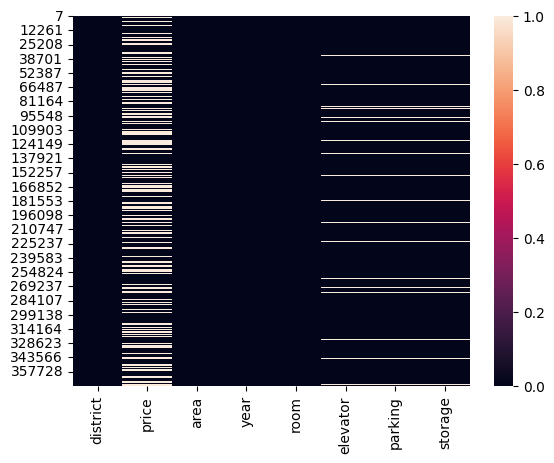

In [ ]:
import seaborn as sns
sns.heatmap(df_2021.isnull())

**Replacing Nan Values**

In [ ]:
unique_values = df_2021['parking'].unique()
print(unique_values)

[ 1.  0. nan]


In [ ]:
district_dummies = pd.get_dummies(df_2021['district'])
df_2021 = pd.concat([df_2021, district_dummies], axis=1)
print(df_2021.shape)

(170524, 315)


In [ ]:
district_dummies = pd.get_dummies(df_2023['district'])
df_2023 = pd.concat([df_2023, district_dummies], axis=1)
print(df_2023.shape)

(13862, 315)


In [ ]:
df_2023 = df_2023.rename(columns={'district': 'address'})
df_2021 = df_2021.rename(columns={'district': 'address'})

In [ ]:
# district_folder = '/content/drive/MyDrive/data_bootcamp/DS_project/District'

# # Create a dictionary to hold the data
# district_data = {}

# # Loop through the file numbers
# for i in range(1, 23):
#     file_path = f"{district_folder}/dist{i}.txt"
#     district_data[f'dist{i}'] = pd.read_csv(file_path, delimiter="\t", header=None)[0].to_numpy()
# # print(district_data)

# for i, dist_array in enumerate(district_data, start=1):
#         print(dist_array)
#         mask1 = df_2021['address'].str.contains('|'.join(dist_array))
#         mask3 = df_2023['address'].str.contains('|'.join(dist_array))
#         df_2023.loc[mask3, 'district'] = f'{i}'
#         df_2021.loc[mask1, 'district'] = f'{i}'

In [ ]:
df_2021.head(100)

,address,price,area,year,room,elevator,parking,storage,آبشار,آبشار تهران,...,کوی هفدهم شهریور,گاندی,گرگان,گلاب دره,گلچین,گمرک,گیشا,یاخچی آباد,یافت آباد,یوسف آباد
7,نازی آباد,1400000000.000,53.000,1394.000,1.000,1.000,1.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
8,آذربایجان,1580000000.000,70.000,1385.000,2.000,1.000,1.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
9,دروس,NaN,280.000,1399.000,4.000,1.000,1.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
10,آهنگ,700000000.000,45.000,1382.000,1.000,1.000,0.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
11,سبلان,NaN,87.000,1399.000,2.000,1.000,1.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,جردن,6370000000.000,147.000,1380.000,3.000,1.000,1.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
226,سلسبیل,4500000000.000,111.000,1370.000,2.000,0.000,0.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
228,سعادت آباد,4690000000.000,85.000,1388.000,2.000,1.000,1.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0
229,جنت آباد جنوبی,3100000000.000,90.000,1398.000,2.000,0.000,1.000,1.000,0,0,...,0,0,0,0,0,0,0,0,0,0


**Saving Clean Data**

In [ ]:
column_order = df_2021.columns

# Reorder the columns in df2 to match df1
df_2023 = df_2023[column_order]

In [ ]:
df_2021.to_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2021_data.csv', index=False)

df_2023.to_csv('/content/drive/MyDrive/data_bootcamp/DS_project/2023_data.csv', index=False)

In [ ]:
df_2021.isnull().sum()

address           0
price         60778
area              2
year             16
room              4
              ...  
گمرک              0
گیشا              0
یاخچی آباد        0
یافت آباد         0
یوسف آباد         0
Length: 315, dtype: int64